A bit of theory.

Let us consider following model:

$$
    \begin{cases}
        \dfrac{dS_t}{S_t} = r dt + \sqrt{v_t} dW_t^1 \\
        dv_t = k(\theta - v_t) + \sigma \sqrt{v_t} dW_t^2, dW_t^1 dW_t^2 = \rho dt
    \end{cases}
$$
For volatility $v_t$ we have Cos-Ingersoll-Rox(CIR) process. There $\theta$ is a mean-reversion level, $k$ is a rate of mean-reverting and $\sigma$ is a vol of vol. If $k\theta > \sigma^2$ solution exists and never richs zero. 

We want to price vanila eurocall option:
$$
C_T = (S_T - K)^{+} = S_T I_{S_T \geq K} - K I_{S_T \geq K}
$$General fomula for nonarbitrage price:
$$
C_t = N_t \mathbb{E}^{P_N}\left[ \dfrac{C_T}{N_T} | F_t \right]
$$
where $N_t$ is numerare and $P_N$ is corresponding martingale measure. It is straitforward that $P_B = P$, i.e. initial measure is risk-neutral. Let us price first term in $P_S$ measure:
$$
C_t = S_t \mathbb{P}_S(S_T \geq K) - Ke^{-r(T-t)} \mathbb{P}(S_T \geq K)
$$It's easy to see that:
$$
d \mathbb{P}_S = e^{-rT} \dfrac{S_T}{S_0} d\mathbb{P} = Z_T d \mathbb{P}
$$where
$$
Z_T = e^{-rT} \dfrac{S_T}{S_0}
$$
We need to check that both $B_t^* = B_t / S_t$ and $S_t^* = S_t / S_t$ are martingales w.r.t. $\mathbb{P}_S$. It's sufficient to check that $Z_t B_t^*$ is martingale:
$$
Z_t B_t^* = e^{-rt} \dfrac{S_t}{S_0} \dfrac{B_t}{S_t} = \dfrac{1}{S_0}
$$is constant, therefore it is martingale.

Let us consider characteristic function of the process $X_t = \ln S_t$:
$$
\phi(x, t, v; u) = \mathbb{E}^P e^{iuX_T}
$$where $X_t = x, v_t = v$. 
$$
\tilde{\phi}(x, t, v; u) = \mathbb{E}^{P_S} e^{iuX_T}
$$Using Baessian formula for conditional expectation:
$$
\mathbb{E}^{P_S} e^{iuX_T} = \dfrac{1}{Z_t} \mathbb{E}^{P} Z_Te^{iuX_T} = e^{rt-x} \mathbb{E}^P e^{-rT} e^{iuX_T + X_T} = e^{-r(T-t)-x}\phi(x, t, v; u-i)
$$But
$$
\phi(x, t, v; -i) = \mathbb{E}^{P} e^{X_T} = \mathbb{E}^P S_T = S_te^{r(T-t)} = e^{x+r(T-t)}
$$then:
$$
\tilde{\phi}(x, t, v; u) = \dfrac{\phi(x, t, v; u-i)}{ \phi(x, t, v; -i)}
$$

According to Feyman-Kac formula, we have following eqation for $\phi:$
$$
\phi_t + \phi_x(r-v/2) + \phi_v (k\theta - kv) + \dfrac{1}{2} \phi_{xx} v + \dfrac{1}{2} \phi_{vv}\sigma^2 v + \phi_{xv} \sigma\rho v = 0
$$
along with terminal condition:
$$
\phi(x, T, v; u) = e^{iux}
$$

Let 
$$
\phi = e^{iux} e^{C(\tau, u) + v D(\tau, u)}
$$where $\tau = T - t$ is time for expiration.
Then
$$
\begin{cases}
    \phi_t = -\phi C_{\tau} -\phi vD_{\tau}\\
    \phi_x = iu \phi \\
    \phi_v = D \phi \\
    \phi_{xx} = -u^2 \phi \\
    \phi_{vv} = D^2 \phi \\
    \phi_{vx} = iuD \phi
\end{cases}
$$
$$
-C_{\tau} - vD_{\tau} + iu (r - v/2) + D(k\theta - kv) - \dfrac{1}{2}u^2 v + \dfrac{1}{2} v\sigma^2 D^2 + iuDv\rho \sigma = 0
$$Since this equation should be right for all $v$ we have:
$$
\begin{cases}
    C_{\tau} = iur - Dk\theta, C(0) = 0 \\
    D_{\tau} = -iu/2 - u^2/2 + D(-k + \rho \sigma iu) + D^2 \sigma^2/2, D(0) = 0
\end{cases}
$$For $D$ we have Riccati equation:
$$
D' = \alpha + D \beta + D^2 \gamma
$$ where $\alpha = -iu/2 - u^2/2, \beta = \rho \sigma iu - k, \gamma = \sigma^2/2$

Let $d = \sqrt{\beta^2 - 4\alpha\gamma}$ and $r_{\pm} = \dfrac{\beta \pm d}{2}$ and $g = \dfrac{r_{+}}{r_-}$

Then:

$$
\begin{cases}
D = \dfrac{-r_+}{\sigma^2} \dfrac{1-e^{-d\tau}}{1-ge^{-d\tau}}\\
C = riu\tau + \dfrac{k\theta}{\sigma^2} \left[ -r_+ \tau - 2\ln\left( \dfrac{1-ge^{-d\tau}}{1-g} \right) \right]
\end{cases}
$$

If $\phi(u)$ is characteristic function for $X_T$ then:
$$
F_{X_T}(x) = \dfrac{1}{2} - \dfrac{1}{\pi} \int\limits_{0}^{\infty} \Re \left( \dfrac{e^{-iux}\phi(u)}{iu} \right) du
$$Then our probabilities can be computed as follow:
$$
p = \dfrac{1}{2} + \dfrac{1}{\pi} \int\limits_{0}^{\infty} \Re \left( \dfrac{e^{-iu\ln K}\phi(u)}{iu} \right) \\
\tilde{p} = \dfrac{1}{2} + \dfrac{1}{\pi} \int\limits_{0}^{\infty} \Re \left( \dfrac{e^{-iu\ln K}\tilde{\phi}(u)}{iu} \right)
$$

Formaly, this integral doesn't have 

Let $c(k) = e^{\alpha k}e^{-rT} \mathbb{E} \left( e^{X_T} - e^{k} \right)^+$ Let $\phi(u)$ -- characteristic function of $X_T$. Let $\psi(u) = \int_{\mathbb{R}} c(k)e^{iku}du$ -- fourier transform of $c(k)$. Then we can express $\psi(u)$ in terms of $\phi(u)$. We add multiplier $e^{\alpha k}$ in order for $c(k)$ to be integrable over negative part of real line. Let also $p_T(x)$ be the probability density of the process $X_T$. We can express the expectation as integral with this density as follow:
$$
\psi(u) = \int_{\mathbb{R}} c(k)e^{iku}du = e^{-rT}\int_{\mathbb{R}} du e^{iku + \alpha k} \int_{k}^{\infty} dk p_T(x) (e^{x}-e^{k})
$$Let us change the order of integration
$$
k \in (-\infty, \infty), x \in (k, \infty) \to x \in (-\infty, \infty), k \in (-\infty, x)
$$Then:
$$
\psi(u) =e^{-rT}\int_{\mathbb{R}} dx p_T(x) \int_{-\infty}^{x} dk e^{iku + \alpha k} (e^{x}-e^{k})
$$
$$
\int_{-\infty}^{x} dk e^{iku + \alpha k} (e^{x}-e^{k}) = e^{x(iu + \alpha + 1)} \left( \dfrac{1}{iu + \alpha} - \dfrac{1}{iu + \alpha + 1}  \right)
= \dfrac{e^{x(iu + \alpha + 1)}}{\alpha^2 + \alpha - u^2 + iu(2\alpha + 1)}
$$So we have:
$$
\psi(u) =\dfrac{e^{-rT}}{\alpha^2 + \alpha - u^2 + iu(2\alpha + 1)}\int_{\mathbb{R}} dx p_T(x) e^{x(iu + \alpha + 1)} = \dfrac{e^{-rT} \phi(u - i(\alpha + 1))}{\alpha^2 + \alpha - u^2 + iu(2\alpha + 1)}
$$since $x(iu + \alpha + 1) = ix(u -i(\alpha - 1))$. So for option price we have following formula:
$$
c(k) = \dfrac{1}{2\pi} \int_{-\infty}^{\infty} e^{-iku} \psi(u) du
$$

Since $c(k) \in \mathbb{R}$, then \psi(-u) = \phi(u)^*$ and we can show that

$$
c(k) = \dfrac{1}{\pi} \Re \int_{0}^{\infty} e^{-iku} \psi(u) du
$$

In order to calculate this integral consider the finite interval $u \in [0, U]$ with $N+1$ points and constant step $h$. We are going to use mid-point rule for integration, so let us consider points;
$$
u_j = (j + 0.5) h, j=0, \ldots, N-1; u_{N-1} = U-h/2 \to (N-0.5) h = U-0.5h \to h = \dfrac{U}{N}
$$

$$I \sim \int_{0}^{U} e^{-iku} \psi(u) du \sim \sum_{j=0}^{N-1} e^{-ikh*j}e^{-ikh*0.5}\psi(u_j) h = z^{0.5} \sum_{j=0}^{N-1} z^{j} \psi(u_j) h$$
where $z = e^{-ikh} = z(k)$. That is the polynomial representation of function $c(k)$, we can evaluate this for arbitrary $k$ using for example Horner scheme. It is well known that we can calculate the values of polynomial at $N$ points at unit circle with FFT. Consider points:
$$
k_l = -Nh_k + (l+0.5)h_k
$$Then:
$$
z_l = e^{-ik_l h} = e^{i N h_k h}e^{-i h h_k l}e^{-0.5 i h h_k}
$$
Let $h h_k = \dfrac{2\pi}{N}$. Then
$$
z_l = e^{-\frac{2\pi i}{N} l}e^{-i \frac{\pi}{N}}
$$
$$
I_l = \sqrt{z_l} \sum_{j=0}^{N-1} z^{j}_l \psi(u_j) h
= \sqrt{z_l} \sum_{j=0}^{N-1} e^{-\frac{2\pi i}{N} lj} e^{-i \frac{\pi}{N}j}\psi(u_j) h
= \sqrt{z_l} \text{DFT}\left( e^{-i \frac{\pi}{N}j}\psi(u_j) h \right)
$$

Finaly, we have:

$$
C(k_l) = \exp(-\alpha k_l) \dfrac{h}{\pi} \Re \left[ \sqrt{z_l} \text{DFT}\left( e^{-i \frac{\pi}{N}j}\psi(u_j)  \right) \right]
$$

In [1]:
from montecarlo import *
from heston import *

from matplotlib import pyplot as plt

In [2]:
r = 0.025
k = 2.5
sig = 0.1
theta = 0.015
rho = -0.05


S0 = 1.0
K = 1.0
T = 15.5

Kn = K * np.exp( np.linspace(-np.log(15), np.log(15), 100) )

Kn = Kn.reshape(-1, 1)




Nt = 100
Nu = 100
tn = np.linspace(0, T, Nt)

v0 = 0.0175
x0 = np.log(S0)

In [3]:
C1 = getOptionPrice(S0, Kn, Nu, T, r, k, sig, theta, rho, v0)

C2 = getOptionPrice(S0, Kn, 2 * Nu, T, r, k, sig, theta, rho, v0)

C3 = getOptionPrice(S0, Kn, 4 * Nu, T, r, k, sig, theta, rho, v0)


R1 = (C2 - C1) / 3.0
R2 = (C3 - C2) / 3.0

C22 = C2 + R1
C32 = C3 + R2

R = (C32 - C22) / 15.0

C = C32 + R

In [4]:
Npath = 5000

v, x = generate_path_chi(r, k, sig, theta, rho, x0, v0, tn, Npath)

S = np.exp(x)
S = (S - np.mean(S)) + S0 * np.exp(r * T)

S = S.reshape(1, -1)

payoffs = np.maximum( S - Kn.reshape(-1, 1), 0.0 )

C2 = np.exp(-r * T) * np.mean(payoffs, axis=1)

In [5]:
C3 = BlackSholes(Kn, S0, T, r, theta, k, v0).reshape(-1)

In [6]:
C4, Knfft = getOptionPriceFFT(S0, Kn, Nu, T, r, k, sig, theta, rho, v0)

In [7]:
C4.shape

(68,)

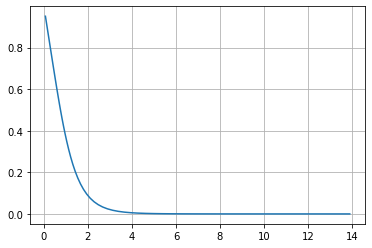

In [8]:
plt.plot(Knfft, C4, label='DFT')
plt.grid()

Text(0, 0.5, 'Call price')

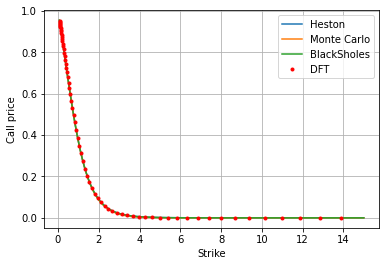

In [9]:
plt.plot(Kn, C1, label='Heston')
plt.plot(Kn, C2, label='Monte Carlo')
plt.plot(Kn, C3, label='BlackSholes')
plt.plot(Knfft, C4, '.r', label='DFT')

plt.legend()
plt.grid()
plt.xlabel("Strike")
plt.ylabel("Call price")